In [12]:
%load_ext autoreload
%autoreload 2

import os

from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from adni_2d import ADNIDataset2D
import torchvision.transforms as transforms
from dataset_train2D import RandomGenerator

# Training settings
batch_size = 32
iteration = 10000
lr = [0.001, 0.01]
momentum = 0.9
cuda = True
seed = 8
log_interval = 20
l2_decay = 5e-4
source1_name = "GE"
source2_name = "Philips"
target_name = "Siemens"
dataset = "ADNI1"

IMG_PATH = "./Dataset/ADNI1"
results_dir = "./Results"
img_size = 224
num_workers = 4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
dataset = ADNIDataset2D(
    root="data\\preprocess\\ADNI1_T1_All_MRI\\6_step_nifti_2d",
    split="train",
    domain=source1_name,
    transform=None,
)

In [3]:
# train
len(dataset)

10208

In [4]:
# val
len(dataset)

10208

In [5]:
# test
len(dataset)

10208

In [8]:
# Get class names as a list
class_names = dataset.classes
class_names

['AD', 'CN']

In [9]:
# Can also get class names as a dict
class_dict = dataset.class_to_idx
class_dict

{'AD': 0, 'CN': 1}

In [10]:
img, label = dataset[16]["image"], dataset[16]["label"]
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image shape: (224, 224)
Image datatype: float32
Image label: 0
Label datatype: <class 'int'>


Original shape: (224, 224) -> [color_channels, height, width]


Text(0.5, 1.0, 'AD')

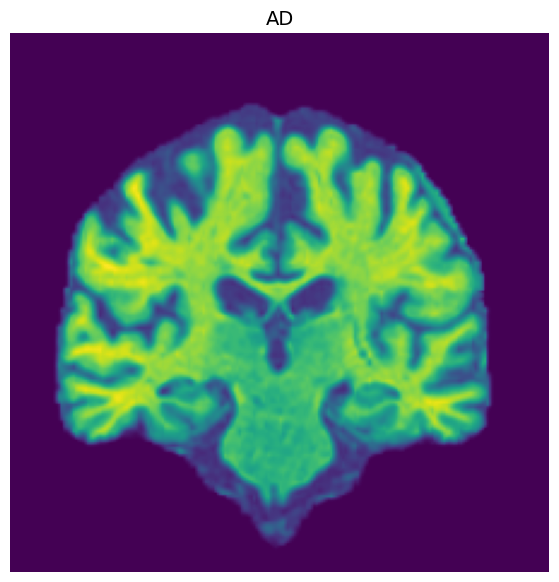

In [11]:
# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv(
    r"C:\Users\doxda\OneDrive\Documentos\Repos\DAMS\idaSearch_9_01_2024.csv"
)

In [43]:
df[["Manufacturer", "Model"]] = df["Imaging Protocol"].str.extract(
    "Manufacturer=(.+);Mfg Model=(.+);W", expand=True
)

In [44]:
df[df["Research Group"].isin(["CN", "AD"])]["Subject ID"].nunique()

429

In [45]:
df.head()

,Subject ID,Phase,Sex,Research Group,Visit,Age,Description,Imaging Protocol,Image ID,Manufacturer,Model
0,002_S_0295,ADNI 1,M,CN,ADNI Screening,84.9,B1-Calibration Body,Acquisition Plane=SAGITTAL;Manufacturer=GE MED...,13710,GE MEDICAL SYSTEMS,SIGNA EXCITE
1,002_S_0295,ADNI 1,M,CN,ADNI Screening,84.9,B1-Calibration PA,Acquisition Plane=SAGITTAL;Manufacturer=GE MED...,13711,GE MEDICAL SYSTEMS,SIGNA EXCITE
2,002_S_0295,ADNI 1,M,CN,ADNI Screening,84.9,3-plane localizer,Acquisition Plane=AXIAL;Manufacturer=GE MEDICA...,13712,GE MEDICAL SYSTEMS,SIGNA EXCITE
3,002_S_0295,ADNI 1,M,CN,ADNI Screening,84.9,3-plane localizer,Acquisition Plane=CORONAL;Manufacturer=GE MEDI...,13713,GE MEDICAL SYSTEMS,SIGNA EXCITE
4,002_S_0295,ADNI 1,M,CN,ADNI Screening,84.9,3-plane localizer,Acquisition Plane=SAGITTAL;Manufacturer=GE MED...,13714,GE MEDICAL SYSTEMS,SIGNA EXCITE


In [46]:
df.groupby(["Research Group"])["Image ID"].nunique()

Research Group
AD     200
CN     229
MCI    416
Name: Subject ID, dtype: int64

In [47]:
df.groupby(["Sex"])["Subject ID"].nunique()

Sex
F    357
M    488
Name: Subject ID, dtype: int64

In [39]:
df.groupby(["Manufacturer", "Research Group", "Sex"])["Subject ID"].nunique()

Manufacturer             Research Group  Sex
GE MEDICAL SYSTEMS       AD              F       47
                                         M       52
                         CN              F       52
                                         M       55
                         MCI             F       68
                                         M      135
Philips Medical Systems  AD              F        5
                                         M        6
                         CN              F        7
                                         M       15
                         MCI             F        7
                                         M       23
SIEMENS                  AD              F       47
                                         M       51
                         CN              F       65
                                         M       54
                         MCI             F       88
                                         M      124
Name: Subject ID, d

In [26]:
df.groupby(["Manufacturer", "Visit"])["Subject ID"].nunique()

Manufacturer             Visit            
GE MEDICAL SYSTEMS       ADNI Baseline         29
                         ADNI Screening       409
                         ADNI1/GO Month 12    330
                         ADNI1/GO Month 18    157
                         ADNI1/GO Month 24    286
                         ADNI1/GO Month 36    190
                         ADNI1/GO Month 48     56
                         ADNI1/GO Month 6     348
                         No Visit Defined       5
Philips Medical Systems  ADNI Screening        15
                         ADNI1/GO Month 12     14
                         ADNI1/GO Month 18      8
                         ADNI1/GO Month 24     36
                         ADNI1/GO Month 36     31
                         ADNI1/GO Month 48      1
                         ADNI1/GO Month 6      12
SIEMENS                  ADNI Baseline        108
                         ADNI Screening       331
                         ADNI1/GO Month 12    344
       